In [1]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 11.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import sklearn
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier,HistGradientBoostingClassifier

In [6]:
strat_test_set = pd.read_csv('/content/test.csv')
strat_train_set= pd.read_csv('/content/train.csv')
submission=pd.read_csv('submission.csv')

In [7]:
genre = strat_train_set.copy()

In [ ]:
genre.head()

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,"Lata Mangeshkar, Hariharan",Likha Hai Yeh,23.0,0.370,0.670,7.0,-11.007,0.0,0.0445,0.8090,0.000006,0.2360,0.802,177.164,5.209333,3.0,3.0
1,1,Kalan.FrFr,No Love ft. Mozzy & Cypress Moreno,45.0,0.659,0.639,6.0,-8.138,1.0,0.3880,0.4160,NaN,0.1160,0.688,99.517,206602.000000,4.0,5.0
2,2,The Cure,Play For Today,51.0,0.458,0.731,11.0,-12.049,0.0,0.1450,0.0487,0.021500,0.1160,0.784,80.425,218960.000000,4.0,6.0
3,3,Miguel Poveda,Coplas Del Querer,40.0,0.508,0.287,5.0,-8.898,0.0,0.0481,0.8340,NaN,0.0963,0.324,96.139,332467.000000,3.0,9.0
4,4,Leif Vollebekk,Long Blue Light,63.0,0.552,0.485,9.0,-9.111,1.0,0.0332,0.5170,0.106000,0.1640,0.510,71.548,200173.000000,4.0,1.0


In [ ]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14045 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12784 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10837 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [ ]:
genre.describe()

,id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14045.000000,14396.000000,14396.000000,12784.000000,14396.000000,14396.000000,14396.000000,14396.000000,10837.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7197.500000,44.591954,0.542981,0.663347,5.957838,-7.897393,0.638580,0.079479,0.246606,0.177489,0.195594,0.486931,122.729981,2.009550e+05,3.927341,6.695679
std,4155.911573,17.436540,0.166668,0.235709,3.190628,4.063214,0.480429,0.083048,0.310371,0.304133,0.158487,0.240281,29.558253,1.118463e+05,0.352828,3.206170
min,0.000000,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.013600,0.018300,34.132000,5.339167e-01,1.000000,0.000000
25%,3598.750000,33.000000,0.430000,0.510000,3.000000,-9.525250,0.000000,0.034800,0.004208,0.000088,0.097400,0.299000,99.799000,1.669988e+05,4.000000,5.000000
50%,7197.500000,44.000000,0.545000,0.701000,6.000000,-7.006000,1.000000,0.047400,0.080750,0.003920,0.129000,0.481000,120.069500,2.095845e+05,4.000000,8.000000
75%,10796.250000,56.000000,0.659000,0.861000,9.000000,-5.161000,1.000000,0.082500,0.434000,0.199000,0.257000,0.673000,141.990250,2.522970e+05,4.000000,10.000000
max,14395.000000,100.000000,0.989000,0.999000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


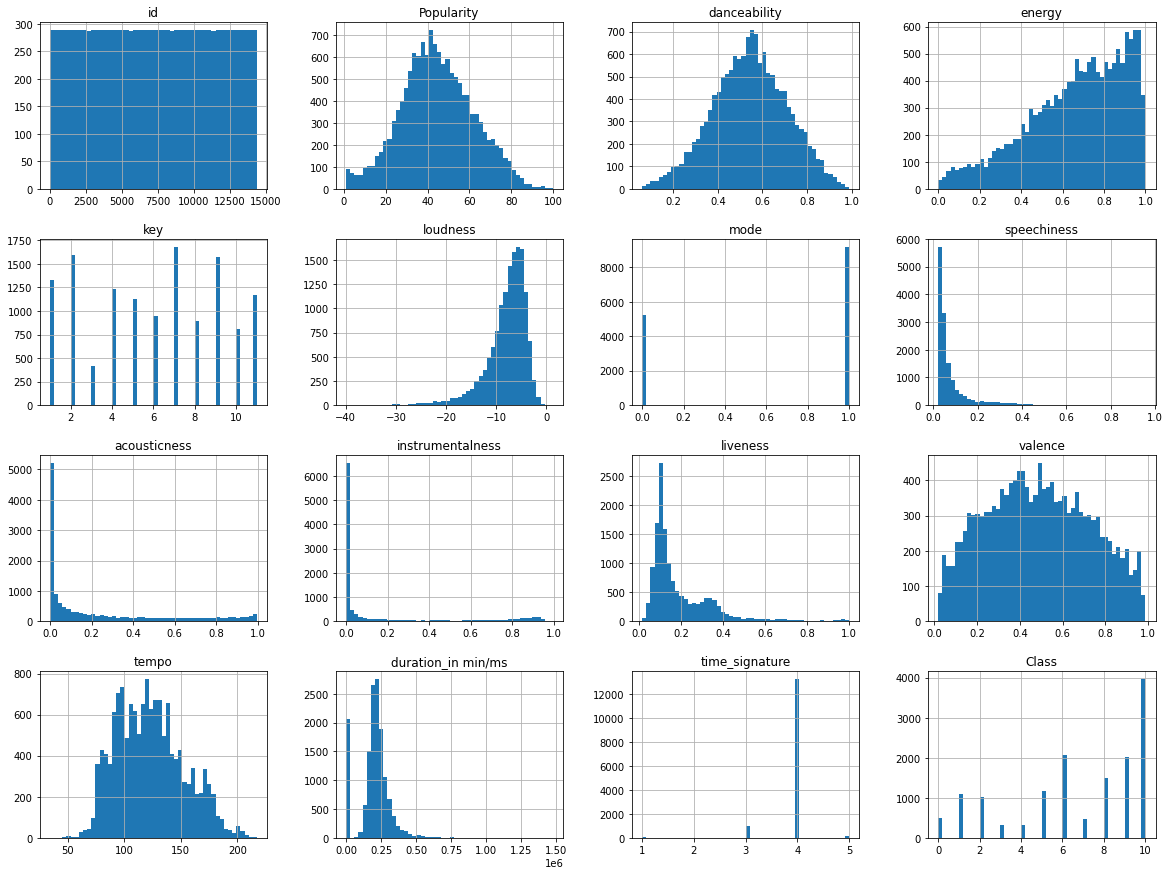

In [ ]:
genre.hist(bins=50, figsize=(20,15));

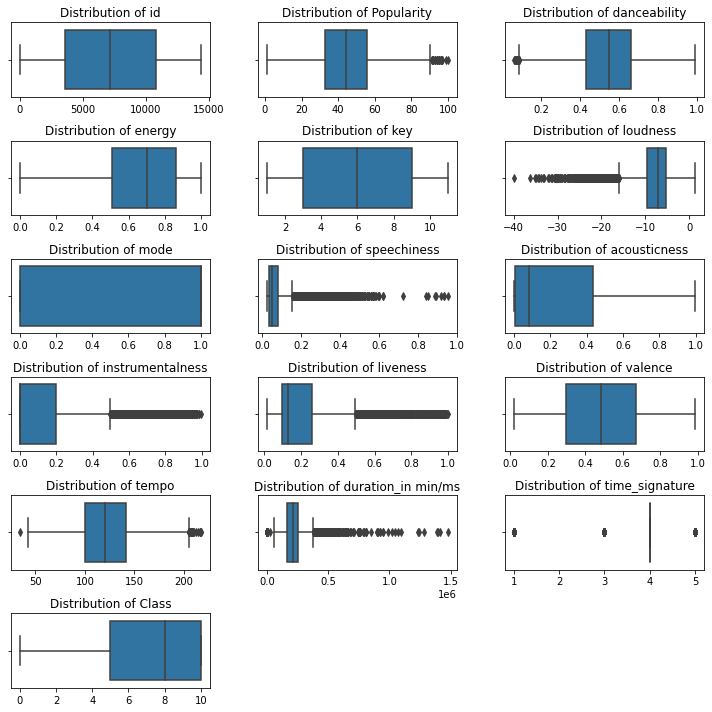

In [ ]:
df_cont = genre.select_dtypes([int,float])
fig = plt.figure(figsize=(10, 10))
for i,columns in enumerate(df_cont.columns, 1):
    ax = plt.subplot(6,3,i)
    sns.boxplot(data = df_cont, x=df_cont[columns])
    ax.set_xlabel(None) 
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3) 
plt.show()

In [ ]:
genre.isnull().sum()

id                       0
Artist Name              0
Track Name               0
Popularity             351
danceability             0
energy                   0
key                   1612
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3559
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

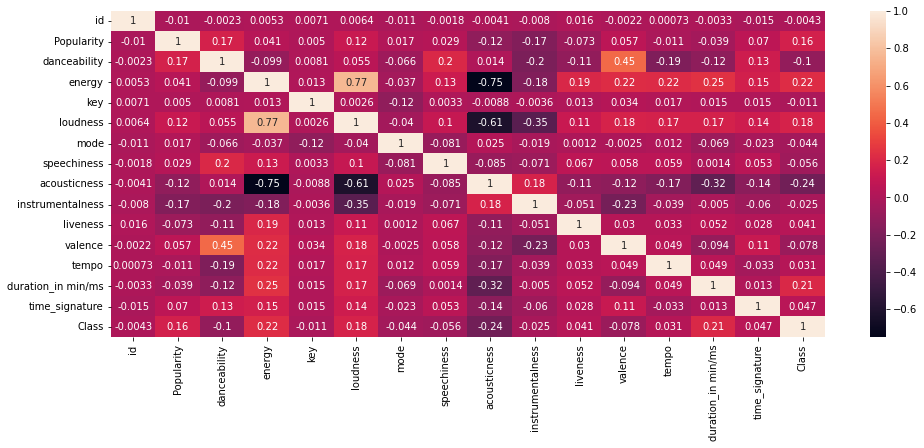

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data = genre.corr(), annot = True)

In [ ]:
corr_matrix = genre.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class                 1.000000
energy                0.221837
duration_in min/ms    0.205521
loudness              0.179647
Popularity            0.159977
time_signature        0.047389
liveness              0.041245
tempo                 0.031248
id                   -0.004332
key                  -0.010587
instrumentalness     -0.025039
mode                 -0.043674
speechiness          -0.055894
valence              -0.078111
danceability         -0.101228
acousticness         -0.241062
Name: Class, dtype: float64

In [ ]:
genre.loc[(genre['duration_in min/ms'] < 30)]['duration_in min/ms']

0       5.21
6       4.46
7       5.54
8       4.53
9       3.55
        ... 
14349   4.92
14362   3.91
14366   6.49
14383   4.19
14391   4.05
Name: duration_in min/ms, Length: 2059, dtype: float64

In [8]:
condition = genre['duration_in min/ms'] < 30 
genre.loc[condition,'duration_in min/ms'] = genre.loc[condition,'duration_in min/ms']*60000

In [9]:
genre.drop(columns=["id","Track Name","Artist Name"], inplace=True)

In [10]:
genre["key"].fillna(-1, inplace=True)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
genre["instrumentalness"] = imputer.fit_transform(genre["instrumentalness"].to_numpy().reshape(-1,1))
genre["Popularity"] = imputer.fit_transform(genre["Popularity"].to_numpy().reshape(-1,1))

In [ ]:
genre.isnull().sum()

Artist Name           0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [11]:
def transformer(df:pd.DataFrame,colxtran):
  temp = df.copy()
  for column, transformation in colxtran:
    temp[column] = df[column].transform(transformation)
  return temp.copy()

cxt = [('loudness',np.cbrt),('acousticness',np.cbrt),('tempo',np.cbrt),('liveness',np.log),
       ('instrumentalness',np.log),('speechiness',np.reciprocal),('duration_in min/ms',np.sqrt)]
transformed_train = transformer(genre,cxt)

In [12]:
genre_f=transformed_train.copy()

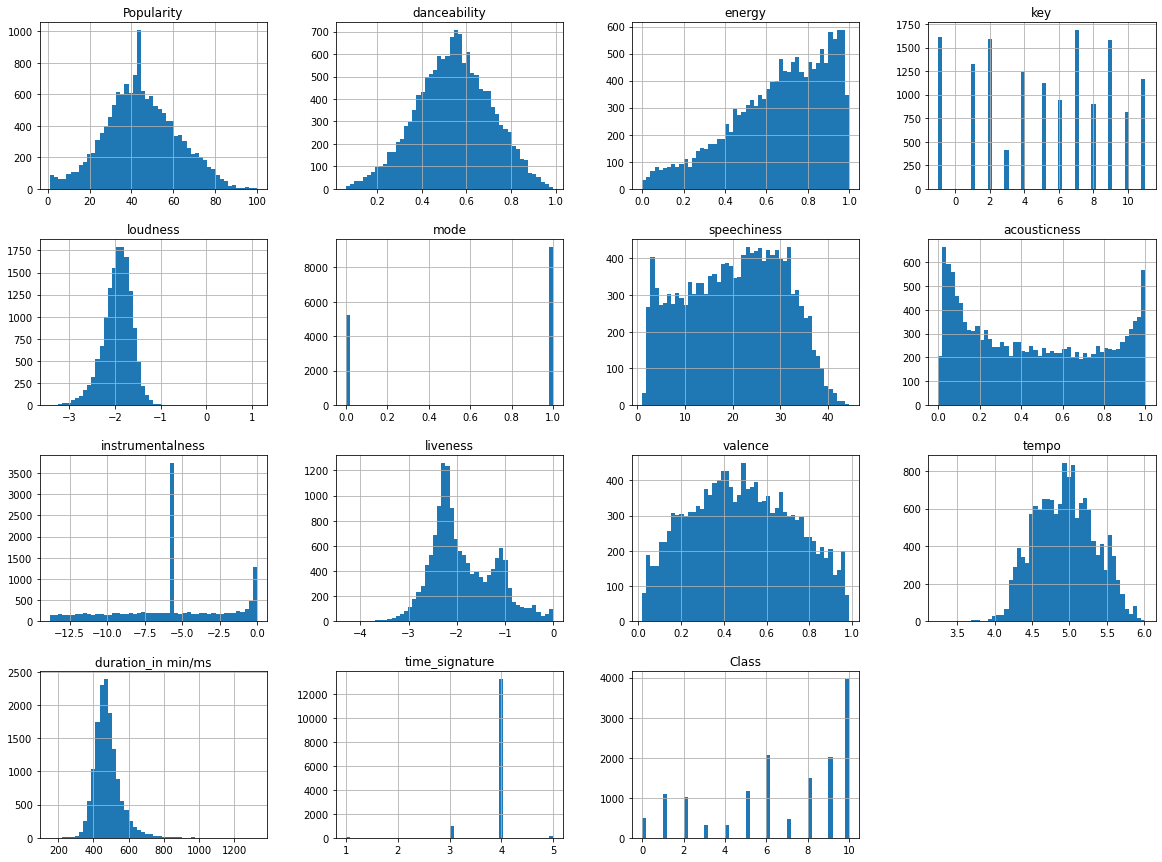

In [ ]:
genre_f.hist(bins=50, figsize=(20,15));

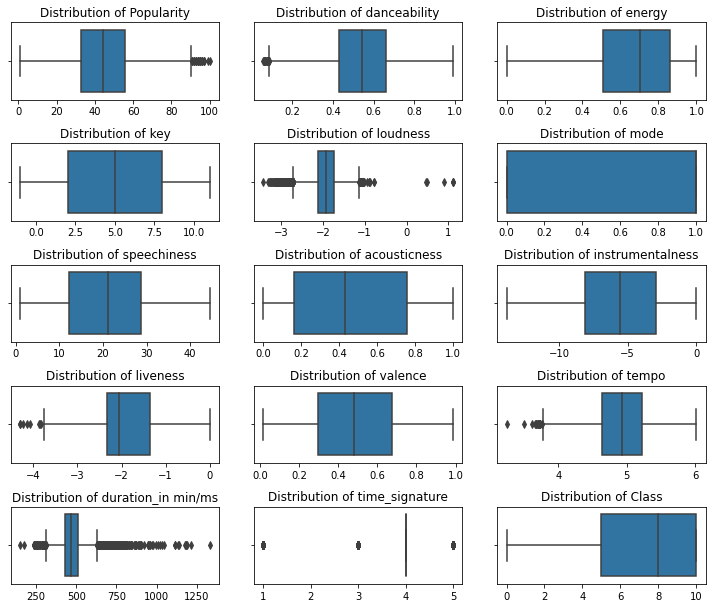

In [ ]:
df_cont = genre_f.select_dtypes([int,float])
fig = plt.figure(figsize=(10, 10))
for i,columns in enumerate(df_cont.columns, 1):
    ax = plt.subplot(6,3,i)
    sns.boxplot(data = df_cont, x=df_cont[columns])
    ax.set_xlabel(None) 
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3) 
plt.show()

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#genre["Artist Name"] = le.fit_transform(genre["Artist Name"])

In [14]:
from sklearn.preprocessing import StandardScaler
features = ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo",'duration_in min/ms']
scaler = StandardScaler()
genre_f[features] = pd.DataFrame(scaler.fit_transform(genre_f[features]), columns=features)

In [15]:
genre_df =genre_f.drop("Class", axis=1)
genre_labels = genre_f["Class"].copy()

In [ ]:
genre_labels.value_counts()

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE
genre_df,genre_labels= SMOTE().fit_resample(X=genre_df,y=genre_labels)

In [ ]:
genre_labels.value_counts()

3     3959
5     3959
6     3959
9     3959
1     3959
10    3959
0     3959
7     3959
2     3959
8     3959
4     3959
Name: Class, dtype: int64

In [17]:

X_train, X_test, y_train, y_test = train_test_split(genre_df, genre_labels, test_size=.2,random_state =123)
classifiers_list =[LGBMClassifier,LogisticRegression,SGDClassifier,XGBClassifier,RandomForestClassifier,AdaBoostClassifier,SVC]
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifiers_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 7/7 [01:38<00:00, 14.08s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.79,0.79,None,0.78,10.22
LGBMClassifier,0.71,0.71,None,0.70,6.00
SVC,0.67,0.67,None,0.65,48.18
XGBClassifier,0.60,0.60,None,0.58,28.35
LogisticRegression,0.52,0.52,None,0.49,1.92
AdaBoostClassifier,0.46,0.46,None,0.42,3.20
SGDClassifier,0.45,0.45,None,0.40,0.70


In [18]:
import optuna
def objective(trial):
      n_estimators = trial.suggest_int('n_estimators', 2, 20)
      max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
      clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
      return sklearn.model_selection.cross_val_score(clf,genre_df,genre_labels, 
           n_jobs=-1, cv=3).mean()

In [19]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=150)

[I 2023-01-22 12:00:20,842] A new study created in memory with name: no-name-a711fe89-62f5-4a7a-9a5b-795d5df889a1
[I 2023-01-22 12:00:23,759] Trial 0 finished with value: 0.5920691709499134 and parameters: {'n_estimators': 13, 'max_depth': 9.936685642367094}. Best is trial 0 with value: 0.5920691709499134.
[I 2023-01-22 12:00:27,652] Trial 1 finished with value: 0.76171741116902 and parameters: {'n_estimators': 19, 'max_depth': 19.027254893934046}. Best is trial 1 with value: 0.76171741116902.
[I 2023-01-22 12:00:28,410] Trial 2 finished with value: 0.4430876339942796 and parameters: {'n_estimators': 12, 'max_depth': 3.5451226093888306}. Best is trial 1 with value: 0.76171741116902.
[I 2023-01-22 12:00:28,753] Trial 3 finished with value: 0.47718689153024946 and parameters: {'n_estimators': 2, 'max_depth': 7.317008341566322}. Best is trial 1 with value: 0.76171741116902.
[I 2023-01-22 12:00:30,260] Trial 4 finished with value: 0.5296796016065618 and parameters: {'n_estimators': 16, 'ma

In [20]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.7731987558553862
Best hyperparameters: {'n_estimators': 20, 'max_depth': 31.8573146594928}


In [21]:
final_model = RandomForestClassifier(n_estimators= 20, max_depth= 31.8573146594928)
final_model.fit(genre_df, genre_labels)
genre_predictions = final_model.predict(genre_df)

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_model, genre_df, genre_labels,
 scoring="accuracy", cv=3)
print(scores)

[0.73362265 0.77066685 0.80208046]


In [23]:
test_set=strat_test_set.copy()

In [26]:
test_set.drop(columns=["id","Track Name","Artist Name"], inplace=True)

In [27]:
condition = test_set['duration_in min/ms'] < 30 
test_set.loc[condition,'duration_in min/ms'] = test_set.loc[condition,'duration_in min/ms']*60000

In [28]:
test_set["key"].fillna(-1, inplace=True)
from sklearn.impute import SimpleImputer
test_set["instrumentalness"] = imputer.transform(test_set["instrumentalness"].to_numpy().reshape(-1,1))
test_set["Popularity"] = imputer.transform(test_set["Popularity"].to_numpy().reshape(-1,1))

In [29]:
transformed_test = transformer(test_set,cxt)
test_set = transformed_test.copy()

In [30]:
test_set[features] = pd.DataFrame(scaler.transform(test_set[features]), columns=features)

In [31]:
final_predictions = final_model.predict(test_set)

In [33]:
submission['Class'] = final_predictions

In [34]:
submission.to_csv("final_sub.csv", index=False)